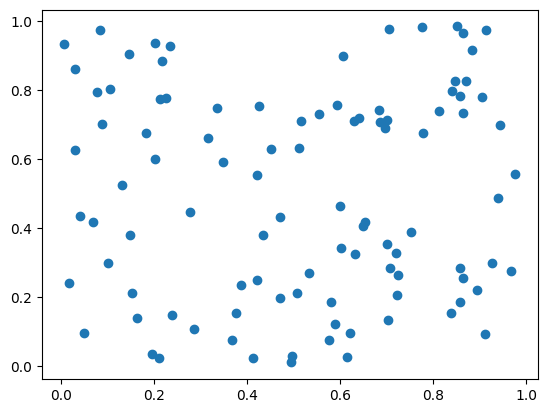

In [88]:
import numpy as np
import matplotlib.pyplot as plt

randdata = np.random.rand(100,2)
plt.scatter(randdata[:, 0], randdata[:, 1])

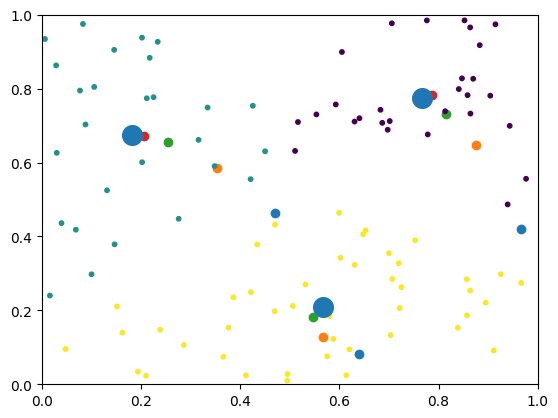

In [214]:
import math

def kmeans(k, n, data):
    centroids = [np.random.rand(2,1) for i in range(k)]
    

    for i in range(n):
        closest = []
        for point in data:
            dists = [math.dist(point,centroid) for centroid in centroids]
            for i in range(len(dists)):
                if (dists[i] == min(dists)):
                    closest.append(i)
                    break
            
        plt.scatter([centroid[0] for centroid in centroids],[centroid[1] for centroid in centroids])
        for i in range(len(centroids)):
            cluster_points =  np.array([[data[j][0] for j in range(len(data)) if closest[j] == i],[data[j][1] for j in range(len(data)) if closest[j] == i]])
            cluster_points = np.concatenate([cluster_points, centroids[i].reshape(-1,1)], axis=1)
            
            centroids[i] = np.average(cluster_points, axis=1).reshape(-1,1)
        

    plt.scatter(data[:, 0], data[:, 1], c=closest, s=10)
    plt.scatter([centroid[0] for centroid in centroids],[centroid[1] for centroid in centroids], s=200)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return centroids



weights = kmeans(3, 100, randdata)

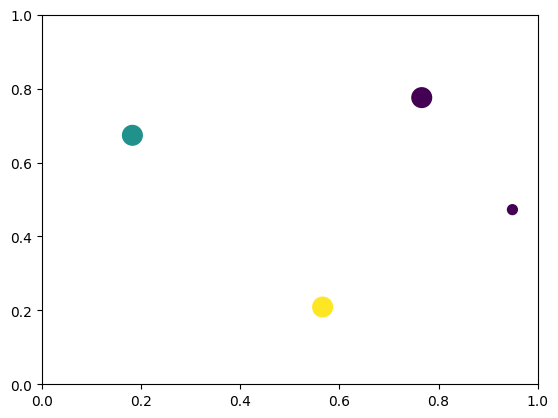

In [334]:
def predict(point, centroids):
    dists = [math.dist(point,centroid) for centroid in centroids]
    return dists.index(min(dists))
    

randpt = np.random.rand(2,1)


x = list(map(lambda centroid: float(centroid[0]), weights)) + [float(randpt[0])]
y = list(map(lambda centroid: float(centroid[1]), weights)) + [float(randpt[1])]
plt.scatter(x,y,
            s=[200 for i in range(len(weights))] + [50],
            c=[i for i in range(len(weights))] + [predict(randpt,weights)])

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
# 